In [1]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
import math
from numpy import linalg as LA
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.preprocessing import StandardScaler
from sympy import Point, Line

In [2]:
%config IPCompleter.greedy=True

In [3]:
df = pd.read_csv('~/MasterThesis/Data/iris.csv')

In [4]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


**Feature Scaling**

In [5]:
df = df.iloc[:,0:4]
scaler = StandardScaler()
df = scaler.fit_transform(df)

**Principal Component Analysis for Dimentionality Reduction**

In [6]:
pca = PCA(n_components=3)
pca.fit(df)

PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [7]:
df_3d=pca.transform(df)

In [8]:
df_3d

array([[-2.26454173e+00,  5.05703903e-01, -1.21943348e-01],
       [-2.08642550e+00, -6.55404729e-01, -2.27250832e-01],
       [-2.36795045e+00, -3.18477311e-01,  5.14796236e-02],
       [-2.30419716e+00, -5.75367713e-01,  9.88604444e-02],
       [-2.38877749e+00,  6.74767397e-01,  2.14278490e-02],
       [-2.07053681e+00,  1.51854856e+00,  3.06842583e-02],
       [-2.44571134e+00,  7.45626750e-02,  3.42197636e-01],
       [-2.23384186e+00,  2.47613932e-01, -8.25744645e-02],
       [-2.34195768e+00, -1.09514636e+00,  1.53562399e-01],
       [-2.18867576e+00, -4.48629048e-01, -2.46559522e-01],
       [-2.16348656e+00,  1.07059558e+00, -2.64009373e-01],
       [-2.32737775e+00,  1.58587455e-01,  1.00165616e-01],
       [-2.22408272e+00, -7.09118158e-01, -2.23214514e-01],
       [-2.63971626e+00, -9.38281982e-01,  1.89570030e-01],
       [-2.19229151e+00,  1.88997851e+00, -4.69480095e-01],
       [-2.25146521e+00,  2.72237108e+00,  3.26037967e-02],
       [-2.20275048e+00,  1.51375028e+00

In [9]:
sample = df_3d

**Elbow Implimentation with SD Validation Index**

*Reference :https://cran.r-project.org/web/packages/clusterCrit/vignettes/clusterCrit.pdf page 16   https://pdfs.semanticscholar.org/adef/c554b325e4bcb52dff292d6462c6ce20630d.pdf page 16*

In [10]:
SD_INDEX={}
K = range(9,1,-1)
alpha=0
#Variance of whole data and its Euclidean Norm
sample_variance = pd.DataFrame(sample,columns=["PC1","PC2","PC3"]).var()
sample_variance_norm = LA.norm(sample_variance,2)
#print("Sample variance ="+str(sample_variance))
for k in K :
    SD_INDEX[k]=0
    sum_inverse_dist=0
    variance_norm=0
    kmeansModel = KMeans(n_clusters=k)
    labels= kmeansModel.fit_predict(sample)
    
    centers = kmeansModel.cluster_centers_
    pairwise_center_dist = euclidean_distances(centers)
    #print(pairwise_center_dist)
    
    #Maximum and Minimum distance between cluster centers
    D_max = pairwise_center_dist.max()
    D_min = pairwise_center_dist[np.nonzero(pairwise_center_dist)].min()
    
    sample_transformed = kmeansModel.fit_transform(sample)
    for i in range(0,k):
        cluster_datapoints = pd.DataFrame(sample[labels==i],columns=["PC1","PC2","PC3"])
        #print(cluster_datapoints.head())
        
        #Mean Value of each dimention of datapoints in this cluster
        cluster_mean = cluster_datapoints.mean(axis=0)
        
        # Calculating Average Scattering for cluster
        cluster_variance = cluster_datapoints.var()
        #print(cluster_variance)
        
        # Calculating sum of Euclidean Norm or variance measured above for each cluster
        variance_norm += LA.norm(cluster_variance,2)
        #print("variance ="+str(variance_norm))
        
        #Caculating Seperation betwrrn clusters "D"
        sum_inverse_dist = sum_inverse_dist + 1/pairwise_center_dist.sum() 
        
    mean_var_norm=variance_norm/k
    avg_scattering =  mean_var_norm/sample_variance_norm
    print("Avg Scatering ="+str(avg_scattering))
    
    D = (D_max/D_min)*sum_inverse_dist
    print("D = "+str(D))
    
    if(k==9):
        alpha = D
    print("constant = "+str(alpha))
    
    C = (alpha*avg_scattering) + D
    SD_INDEX[k]=C
    print("SD_index = "+str(SD_INDEX))
    print("//")

Avg Scatering =0.07681023323876615
D = 0.2790965767617227
constant = 0.2790965767617227
SD_index = {9: 0.30053404991893184}
//
Avg Scatering =0.08862404398605256
D = 0.24641401421553605
constant = 0.2790965767617227
SD_index = {8: 0.27114868151082366, 9: 0.30053404991893184}
//
Avg Scatering =0.11868170521381743
D = 0.27080462627711105
constant = 0.2790965767617227
SD_index = {8: 0.27114868151082366, 9: 0.30053404991893184, 7: 0.3039282839265314}
//
Avg Scatering =0.13468558600862263
D = 0.3012909607660994
constant = 0.2790965767617227
SD_index = {8: 0.27114868151082366, 9: 0.30053404991893184, 6: 0.33888124676025255, 7: 0.3039282839265314}
//
Avg Scatering =0.12751529920416974
D = 0.27783408261738873
constant = 0.2790965767617227
SD_index = {8: 0.27114868151082366, 9: 0.30053404991893184, 5: 0.3134231661100193, 6: 0.33888124676025255, 7: 0.3039282839265314}
//
Avg Scatering =0.1482189476942049
D = 0.32223887328649153
constant = 0.2790965767617227
SD_index = {4: 0.36360627419916897, 5:

**Ploting Elbow**

In [11]:
SSE_array=[]
slope=[]
for key,value in SD_INDEX.items():
    SSE_array.append(value)
print(SSE_array)

#Calculate slope of each line
for p in range(1,8):
    s= (SSE_array[p]-SSE_array[p-1])
    slope.append([p+1,s])
slope

[0.38910214116992947, 0.4315917113192223, 0.36360627419916897, 0.3134231661100193, 0.33888124676025255, 0.3039282839265314, 0.27114868151082366, 0.30053404991893184]


[[2, 0.04248957014929283],
 [3, -0.06798543712005334],
 [4, -0.050183108089149664],
 [5, 0.02545808065023325],
 [6, -0.03495296283372118],
 [7, -0.03277960241570771],
 [8, 0.02938536840810818]]

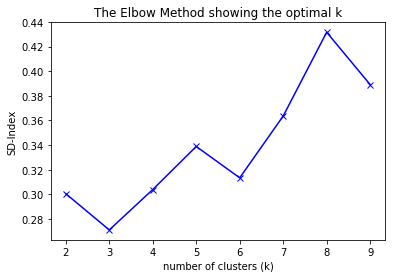

In [12]:
plt.plot(K,SSE_array,'bx-')
plt.xlabel('number of clusters (k)')
plt.ylabel('SD-Index')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [13]:
slope

[[2, 0.04248957014929283],
 [3, -0.06798543712005334],
 [4, -0.050183108089149664],
 [5, 0.02545808065023325],
 [6, -0.03495296283372118],
 [7, -0.03277960241570771],
 [8, 0.02938536840810818]]

In [14]:
#chose the value after which there is a reduction in gain(rather loss)
for a in range(0,6):
    change_slope=(slope[a])[-1] - (slope[a+1])[-1]
    if change_slope < 0:
        print('Optimal Number of Clusters = '+str((slope[a][0])-1))

Optimal Number of Clusters = 2
Optimal Number of Clusters = 3
Optimal Number of Clusters = 5
Optimal Number of Clusters = 6


**Geometric Method of Judging Elbow**
*point of longest distance from line joining first and last element*

In [15]:
distances=[]
for i in range(0,8):
    p1=Point(2,SSE_array[0])
    p2=Point(9,SSE_array[7])
    l1 = Line(p1,p2)
    p=Point(i+2,SSE_array[i])
    l2=l1.perpendicular_segment(p)
    distances.append(l2.length)
index=distances.index(np.max(distances))
print('Optimal number 0f clusters = '+str(index+2))

Optimal number 0f clusters = 3
